In [126]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import  ConfusionMatrixDisplay
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from IPython.display import display, HTML

In [127]:
import warnings
warnings.filterwarnings('ignore')

In [128]:
relevant_cols = [
    "edad",
    "imc",
    "f_diag",
    "tipo_histologico",
    "Grado",
    "valor_de_ca125",
    "ecotv_infiltobj",
    "ecotv_infiltsub",
    "metasta_distan",
    "estadiaje_pre_i",
    "grupo_riesgo",
    "tto_NA",
    "fecha_qx",
    "asa",
    "histo_defin",
    "grado_histologi",
    "tamano_tumoral",
    "afectacion_linf",
    "AP_centinela_pelvico",
    "AP_ganPelv",
    "AP_glanPaor",
    "recep_est_porcent",
    "rece_de_Ppor",
    "beta_cateninap",
    "estudio_genetico_r01",
    "estudio_genetico_r02",
    "estudio_genetico_r03",
    "estudio_genetico_r04",
    "estudio_genetico_r05",
    "estudio_genetico_r06",
    "estadificacion_",
    "FIGO2023",
    "grupo_de_riesgo_definitivo",
    "bqt",
    "qt",
    "Tributaria_a_Radioterapia",
    "recidiva",
    "rdt",
]

In [129]:
data = pd.read_csv("../data_source/IQ_Cancer_Endometrio_merged_NMS.csv")
data_relevant = data[relevant_cols]
data_relevant.head()

edad    imc      f_diag  tipo_histologico  Grado  valor_de_ca125  \
0  68.0  39.40  2023-11-03                 2      2           283.0   
1  92.0  24.14  2019-10-24                 1      1             NaN   
2  72.0  38.80  2020-07-16                 2      1             NaN   
3  78.0  36.30  2021-02-22                 2      1             NaN   
4  68.0  31.10  2019-11-15                 2      1             NaN   

   ecotv_infiltobj  ecotv_infiltsub  metasta_distan  estadiaje_pre_i  ...  \
0              4.0              2.0             1.0              2.0  ...   
1              3.0              4.0             0.0              NaN  ...   
2              3.0              4.0             0.0              0.0  ...   
3              3.0              3.0             0.0              1.0  ...   
4              NaN              3.0             0.0              0.0  ...   

   estudio_genetico_r05  estudio_genetico_r06 estadificacion_  FIGO2023  \
0                   0.0                   1.0             9.0      14.0   
1                   0.0                   1.0             NaN       NaN   
2                   0.0                   1.0             1.0       1.0   
3                   0.0                   1.0             7.0      11.0   
4                   0.0                   1.0             1.0       1.0   

   grupo_de_riesgo_definitivo  bqt   qt  Tributaria_a_Radioterapia  recidiva  \
0                         5.0  0.0  1.0                        0.0         0   
1                         NaN  NaN  NaN                        NaN         0   
2                         1.0  0.0  0.0                        0.0         0   
3                         5.0  1.0  1.0                        1.0         1   
4                         1.0  0.0  0.0                        0.0         0   

   rdt  
0  NaN  
1  NaN  
2  NaN  
3  2.0  
4  NaN  

[5 rows x 38 columns]

In [130]:
data_relevant.describe().T

count        mean         std   min    25%   50%  \
edad                        163.0   62.190184   14.524374   0.0  54.00  63.0   
imc                         155.0   30.726258    7.738904  16.7  24.40  29.4   
tipo_histologico            163.0    4.171779   11.696045   1.0   2.00   2.0   
Grado                       163.0    1.190184    0.393656   1.0   1.00   1.0   
valor_de_ca125               21.0  148.671429  324.352458   3.7  19.30  30.1   
ecotv_infiltobj             157.0    3.331210    1.064512   1.0   3.00   4.0   
ecotv_infiltsub             162.0    2.629630    0.848007   1.0   2.00   2.5   
metasta_distan              159.0    0.056604    0.231814   0.0   0.00   0.0   
estadiaje_pre_i             160.0    0.368750    0.732205   0.0   0.00   0.0   
grupo_riesgo                161.0    1.515528    0.725479   1.0   1.00   1.0   
tto_NA                      163.0    0.018405    0.134825   0.0   0.00   0.0   
asa                         144.0    1.194444    0.532546   0.0   1.00   1.0   
histo_defin                 151.0    2.827815    2.128416   1.0   2.00   2.0   
grado_histologi             145.0    1.206897    0.406485   1.0   1.00   1.0   
tamano_tumoral              132.0    3.829924    4.551802   0.0   1.75   3.0   
afectacion_linf             144.0    0.208333    0.407534   0.0   0.00   0.0   
AP_centinela_pelvico        132.0    2.810606    1.808093   0.0   0.00   4.0   
AP_ganPelv                   55.0    0.563636    1.166883   0.0   0.00   0.0   
AP_glanPaor                  32.0    0.656250    1.207754   0.0   0.00   0.0   
recep_est_porcent            91.0   76.329670   27.057574   0.0  70.00  90.0   
rece_de_Ppor                 89.0   69.528090   30.671311   0.0  60.00  80.0   
beta_cateninap              151.0    0.860927    0.902144   0.0   0.00   1.0   
estudio_genetico_r01        154.0    0.045455    0.208979   0.0   0.00   0.0   
estudio_genetico_r02        154.0    0.006494    0.080582   0.0   0.00   0.0   
estudio_genetico_r03        154.0    0.006494    0.080582   0.0   0.00   0.0   
estudio_genetico_r04        154.0    0.006494    0.080582   0.0   0.00   0.0   
estudio_genetico_r05        154.0    0.019481    0.138657   0.0   0.00   0.0   
estudio_genetico_r06        154.0    0.935065    0.247215   0.0   1.00   1.0   
estadificacion_             139.0    2.467626    2.488531   1.0   1.00   1.0   
FIGO2023                    142.0    3.704225    4.073420   1.0   1.00   1.0   
grupo_de_riesgo_definitivo  143.0    1.965035    1.396235   1.0   1.00   1.0   
bqt                         154.0    0.279221    0.450080   0.0   0.00   0.0   
qt                          153.0    0.209150    0.408038   0.0   0.00   0.0   
Tributaria_a_Radioterapia   155.0    0.232258    0.423642   0.0   0.00   0.0   
recidiva                    163.0    0.288344    0.563542   0.0   0.00   0.0   
rdt                          33.0    1.030303    0.529437   0.0   1.00   1.0   

                              75%     max  
edad                        72.00    92.0  
imc                         35.30    56.1  
tipo_histologico             2.00    88.0  
Grado                        1.00     2.0  
valor_de_ca125              93.80  1486.9  
ecotv_infiltobj              4.00     4.0  
ecotv_infiltsub              3.00     4.0  
metasta_distan               0.00     1.0  
estadiaje_pre_i              0.00     2.0  
grupo_riesgo                 2.00     3.0  
tto_NA                       0.00     1.0  
asa                          2.00     2.0  
histo_defin                  2.00     9.0  
grado_histologi              1.00     2.0  
tamano_tumoral               4.00    38.0  
afectacion_linf              0.00     1.0  
AP_centinela_pelvico         4.00     4.0  
AP_ganPelv                   0.00     3.0  
AP_glanPaor                  0.25     3.0  
recep_est_porcent           90.00   100.0  
rece_de_Ppor                90.00   100.0  
beta_cateninap               2.00     2.0  
estudio_genetico_r01         0.00     1.0  
estudio_gen

In [131]:
data_relevant.isnull().sum()

edad                            0
imc                             8
f_diag                          2
tipo_histologico                0
Grado                           0
valor_de_ca125                142
ecotv_infiltobj                 6
ecotv_infiltsub                 1
metasta_distan                  4
estadiaje_pre_i                 3
grupo_riesgo                    2
tto_NA                          0
fecha_qx                       12
asa                            19
histo_defin                    12
grado_histologi                18
tamano_tumoral                 31
afectacion_linf                19
AP_centinela_pelvico           31
AP_ganPelv                    108
AP_glanPaor                   131
recep_est_porcent              72
rece_de_Ppor                   74
beta_cateninap                 12
estudio_genetico_r01            9
estudio_genetico_r02            9
estudio_genetico_r03            9
estudio_genetico_r04            9
estudio_genetico_r05            9
estudio_geneti

In [132]:
len(data_relevant)

163

In [133]:
data_relevant = data_relevant[data_relevant["recidiva"] != 2]
data_relevant = data_relevant[data_relevant["edad"] != 0.0]
data_relevant["recidiva"].isnull().sum()

np.int64(0)

In [134]:
data_relevant.drop(columns=data_relevant.select_dtypes(include=["object"]).columns, inplace=True)

### Mover target

In [135]:
cols = list(data_relevant.columns)
cols.remove("recidiva")
cols.insert(0, "recidiva")
data_relevant = data_relevant.reindex(columns=cols)
data_relevant.head()

recidiva  edad    imc  tipo_histologico  Grado  valor_de_ca125  \
0         0  68.0  39.40                 2      2           283.0   
1         0  92.0  24.14                 1      1             NaN   
2         0  72.0  38.80                 2      1             NaN   
3         1  78.0  36.30                 2      1             NaN   
4         0  68.0  31.10                 2      1             NaN   

   ecotv_infiltobj  ecotv_infiltsub  metasta_distan  estadiaje_pre_i  ...  \
0              4.0              2.0             1.0              2.0  ...   
1              3.0              4.0             0.0              NaN  ...   
2              3.0              4.0             0.0              0.0  ...   
3              3.0              3.0             0.0              1.0  ...   
4              NaN              3.0             0.0              0.0  ...   

   estudio_genetico_r04  estudio_genetico_r05  estudio_genetico_r06  \
0                   0.0                   0.0                   1.0   
1                   0.0                   0.0                   1.0   
2                   0.0                   0.0                   1.0   
3                   0.0                   0.0                   1.0   
4                   0.0                   0.0                   1.0   

   estadificacion_  FIGO2023  grupo_de_riesgo_definitivo  bqt   qt  \
0              9.0      14.0                         5.0  0.0  1.0   
1              NaN       NaN                         NaN  NaN  NaN   
2              1.0       1.0                         1.0  0.0  0.0   
3              7.0      11.0                         5.0  1.0  1.0   
4              1.0       1.0                         1.0  0.0  0.0   

   Tributaria_a_Radioterapia  rdt  
0                        0.0  NaN  
1                        NaN  NaN  
2                        0.0  NaN  
3                        1.0  2.0  
4                        0.0  NaN  

[5 rows x 36 columns]

In [136]:
categoricas = [
    "tipo_histologico",
    "Grado",
    "ecotv_infiltobj",
    "ecotv_infiltsub",
    "metasta_distan",
    "estadiaje_pre_i",
    "grupo_riesgo",
    "tto_NA",
    "asa",
    "histo_defin",
    "grado_histologi",
    "afectacion_linf",
    "AP_centinela_pelvico",
    "AP_ganPelv",
    "AP_glanPaor",
    "beta_cateninap",
    "estudio_genetico_r01",
    "estudio_genetico_r02",
    "estudio_genetico_r03",
    "estudio_genetico_r04",
    "estudio_genetico_r05",
    "estudio_genetico_r06",
    "estadificacion_",
    "FIGO2023",
    "grupo_de_riesgo_definitivo",
    "bqt",
    "qt",
    "Tributaria_a_Radioterapia",
    "rdt",
    "valor_de_ca125_medido",
    "recep_est_porcent_medido",
    "rece_de_Ppor_medido",
    "tamano_tumoral_medido"    
]

In [137]:
data_relevant["AP_centinela_pelvico"] = data_relevant["AP_centinela_pelvico"].fillna(5)
data_relevant["AP_ganPelv"] = data_relevant["AP_ganPelv"].fillna(4)
data_relevant["AP_glanPaor"] = data_relevant["AP_glanPaor"].fillna(4)

data_relevant["estudio_genetico_r01"] = data_relevant["estudio_genetico_r01"].fillna(0)
data_relevant["estudio_genetico_r02"] = data_relevant["estudio_genetico_r02"].fillna(0)
data_relevant["estudio_genetico_r03"] = data_relevant["estudio_genetico_r03"].fillna(0)
data_relevant["estudio_genetico_r04"] = data_relevant["estudio_genetico_r04"].fillna(0)
data_relevant["estudio_genetico_r05"] = data_relevant["estudio_genetico_r05"].fillna(0)
data_relevant["estudio_genetico_r06"] = data_relevant["estudio_genetico_r06"].fillna(0)

data_relevant.loc[data_relevant["valor_de_ca125"].isna(), "valor_de_ca125_medido"] = 0
data_relevant.loc[~data_relevant["valor_de_ca125"].isna(), "valor_de_ca125_medido"] = 1
data_relevant["valor_de_ca125"] = data_relevant["valor_de_ca125"].fillna(35)

data_relevant.loc[data_relevant["recep_est_porcent"].isna(), "recep_est_porcent_medido"] = 0
data_relevant.loc[~data_relevant["recep_est_porcent"].isna(), "recep_est_porcent_medido"] = 1
data_relevant["recep_est_porcent"] = data_relevant["recep_est_porcent"].fillna(0)

data_relevant.loc[data_relevant["rece_de_Ppor"].isna(), "rece_de_Ppor_medido"] = 0
data_relevant.loc[~data_relevant["rece_de_Ppor"].isna(), "rece_de_Ppor_medido"] = 1
data_relevant["rece_de_Ppor"] = data_relevant["rece_de_Ppor"].fillna(0)

data_relevant["Tributaria_a_Radioterapia"] = data_relevant["Tributaria_a_Radioterapia"].fillna(2)
data_relevant.loc[(data_relevant["Tributaria_a_Radioterapia"] == 1) | (data_relevant["Tributaria_a_Radioterapia"] == 2), "rdt"] = 4
data_relevant.loc[data_relevant["Tributaria_a_Radioterapia"] == 0, "rdt"] = 3

data_relevant.loc[data_relevant["tamano_tumoral"].isna(), "tamano_tumoral_medido"] = 0
data_relevant.loc[~data_relevant["tamano_tumoral"].isna(), "tamano_tumoral_medido"] = 1
data_relevant["tamano_tumoral"] = data_relevant["tamano_tumoral"].fillna(0)

data_relevant["imc"] = data_relevant["imc"].fillna(data_relevant["imc"].median())

data_relevant["ecotv_infiltobj"] = data_relevant["ecotv_infiltobj"].fillna(5)

data_relevant["metasta_distan"] = data_relevant["metasta_distan"].fillna(2)

data_relevant["estadiaje_pre_i"] = data_relevant["estadiaje_pre_i"].fillna(3)

data_relevant["grupo_riesgo"] = data_relevant["grupo_riesgo"].fillna(0)

data_relevant["grupo_riesgo"] = data_relevant["grupo_riesgo"].fillna(0)

data_relevant["asa"] = data_relevant["asa"].fillna(6)

data_relevant["histo_defin"] = data_relevant["histo_defin"].fillna(0)

data_relevant["grado_histologi"] = data_relevant["grado_histologi"].fillna(0)

data_relevant["afectacion_linf"] = data_relevant["afectacion_linf"].fillna(2)

data_relevant["beta_cateninap"] = data_relevant["beta_cateninap"].fillna(2)

data_relevant["estadificacion_"] = data_relevant["estadificacion_"].fillna(0)

data_relevant["FIGO2023"] = data_relevant["FIGO2023"].fillna(0)

data_relevant["grupo_de_riesgo_definitivo"] = data_relevant["grupo_de_riesgo_definitivo"].fillna(0)

data_relevant["bqt"] = data_relevant["bqt"].fillna(2)

data_relevant["qt"] = data_relevant["qt"].fillna(2)

In [138]:
data_relevant[categoricas] = data_relevant[categoricas].astype("category")

data_relevant["tipo_histologico"] = data_relevant["tipo_histologico"].cat.set_categories([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 88])
data_relevant["FIGO2023"] = data_relevant["FIGO2023"].cat.set_categories([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])
data_relevant["grupo_riesgo"] = data_relevant["grupo_riesgo"].cat.set_categories([0, 1, 2, 3])
data_relevant["histo_defin"] = data_relevant["histo_defin"].cat.set_categories([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
data_relevant["AP_centinela_pelvico"] = data_relevant["AP_centinela_pelvico"].cat.set_categories([0, 1, 2, 3, 4, 5])
data_relevant["AP_ganPelv"] = data_relevant["AP_ganPelv"].cat.set_categories([0, 1, 2, 3, 4])
data_relevant["AP_glanPaor"] = data_relevant["AP_glanPaor"].cat.set_categories([0, 1, 2, 3, 4])
data_relevant["estudio_genetico_r02"] = data_relevant["estudio_genetico_r02"].cat.set_categories([0, 1])
data_relevant["estudio_genetico_r03"] = data_relevant["estudio_genetico_r03"].cat.set_categories([0, 1])
data_relevant["estudio_genetico_r04"] = data_relevant["estudio_genetico_r04"].cat.set_categories([0, 1])
data_relevant["estadificacion_"] = data_relevant["estadificacion_"].cat.set_categories([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [139]:
data_relevant.head()

recidiva  edad    imc tipo_histologico Grado  valor_de_ca125  \
0         0  68.0  39.40                2     2           283.0   
1         0  92.0  24.14                1     1            35.0   
2         0  72.0  38.80                2     1            35.0   
3         1  78.0  36.30                2     1            35.0   
4         0  68.0  31.10                2     1            35.0   

  ecotv_infiltobj ecotv_infiltsub metasta_distan estadiaje_pre_i  ...  \
0             4.0             2.0            1.0             2.0  ...   
1             3.0             4.0            0.0             3.0  ...   
2             3.0             4.0            0.0             0.0  ...   
3             3.0             3.0            0.0             1.0  ...   
4             5.0             3.0            0.0             0.0  ...   

  FIGO2023 grupo_de_riesgo_definitivo  bqt   qt Tributaria_a_Radioterapia  \
0       14                        5.0  0.0  1.0                       0.0   
1        0                        0.0  2.0  2.0                       2.0   
2        1                        1.0  0.0  0.0                       0.0   
3       11                        5.0  1.0  1.0                       1.0   
4        1                        1.0  0.0  0.0                       0.0   

   rdt valor_de_ca125_medido recep_est_porcent_medido rece_de_Ppor_medido  \
0  3.0                   1.0                      1.0                 1.0   
1  4.0                   0.0                      0.0                 0.0   
2  3.0                   0.0                      0.0                 0.0   
3  4.0                   0.0                      1.0                 1.0   
4  3.0                   0.0                      1.0                 1.0   

  tamano_tumoral_medido  
0                   0.0  
1                   0.0  
2                   1.0  
3                   1.0  
4                   1.0  

[5 rows x 40 columns]

In [140]:
cols = data_relevant.columns
X_train, X_test, y_train, y_test = train_test_split(data_relevant[cols[1:]], data_relevant[cols[0]], train_size=0.6, stratify=data_relevant["recidiva"], random_state=1)

In [141]:
X_train.isnull().sum() / len(y_train)

edad                          0.0
imc                           0.0
tipo_histologico              0.0
Grado                         0.0
valor_de_ca125                0.0
ecotv_infiltobj               0.0
ecotv_infiltsub               0.0
metasta_distan                0.0
estadiaje_pre_i               0.0
grupo_riesgo                  0.0
tto_NA                        0.0
asa                           0.0
histo_defin                   0.0
grado_histologi               0.0
tamano_tumoral                0.0
afectacion_linf               0.0
AP_centinela_pelvico          0.0
AP_ganPelv                    0.0
AP_glanPaor                   0.0
recep_est_porcent             0.0
rece_de_Ppor                  0.0
beta_cateninap                0.0
estudio_genetico_r01          0.0
estudio_genetico_r02          0.0
estudio_genetico_r03          0.0
estudio_genetico_r04          0.0
estudio_genetico_r05          0.0
estudio_genetico_r06          0.0
estadificacion_               0.0
FIGO2023      

In [142]:
X_train_ohe = pd.get_dummies(X_train, columns=categoricas, prefix=categoricas, drop_first=True)

cols_ohe = X_train_ohe.select_dtypes(include=["bool"]).columns
X_train_ohe[cols_ohe] = X_train_ohe[cols_ohe].astype("category")

X_train_ohe.head()

edad   imc  valor_de_ca125  tamano_tumoral  recep_est_porcent  \
153  52.0  25.4            35.0             1.4               50.0   
157  63.0  28.7            35.0             2.5               90.0   
67   75.0  23.3            35.0             5.0              100.0   
151  59.0  23.4            35.0             1.3               80.0   
74   67.0  23.2            35.0             0.0                0.0   

     rece_de_Ppor tipo_histologico_2 tipo_histologico_3 tipo_histologico_4  \
153          10.0               True              False              False   
157          70.0               True              False              False   
67          100.0               True              False              False   
151          60.0               True              False              False   
74            0.0               True              False              False   

    tipo_histologico_5  ... bqt_2.0 qt_1.0 qt_2.0  \
153              False  ...   False  False  False   
157              False  ...   False  False  False   
67               False  ...   False   True  False   
151              False  ...   False  False  False   
74               False  ...   False  False  False   

    Tributaria_a_Radioterapia_1.0 Tributaria_a_Radioterapia_2.0 rdt_4.0  \
153                         False                         False   False   
157                         False                         False   False   
67                          False                         False   False   
151                         False                         False   False   
74                          False                         False   False   

    valor_de_ca125_medido_1.0 recep_est_porcent_medido_1.0  \
153                     False                         True   
157                     False                         True   
67                      False                         True   
151                     False                         True   
74                      False                        False   

    rece_de_Ppor_medido_1.0 tamano_tumoral_medido_1.0  
153                    True                      True  
157                    True                      True  
67                     True                      True  
151                    True                      True  
74                    False                     False  

[5 rows x 111 columns]

In [143]:
X_train_ohe.dtypes

edad                             float64
imc                              float64
valor_de_ca125                   float64
tamano_tumoral                   float64
recep_est_porcent                float64
                                  ...   
rdt_4.0                         category
valor_de_ca125_medido_1.0       category
recep_est_porcent_medido_1.0    category
rece_de_Ppor_medido_1.0         category
tamano_tumoral_medido_1.0       category
Length: 111, dtype: object

### Análisis datos

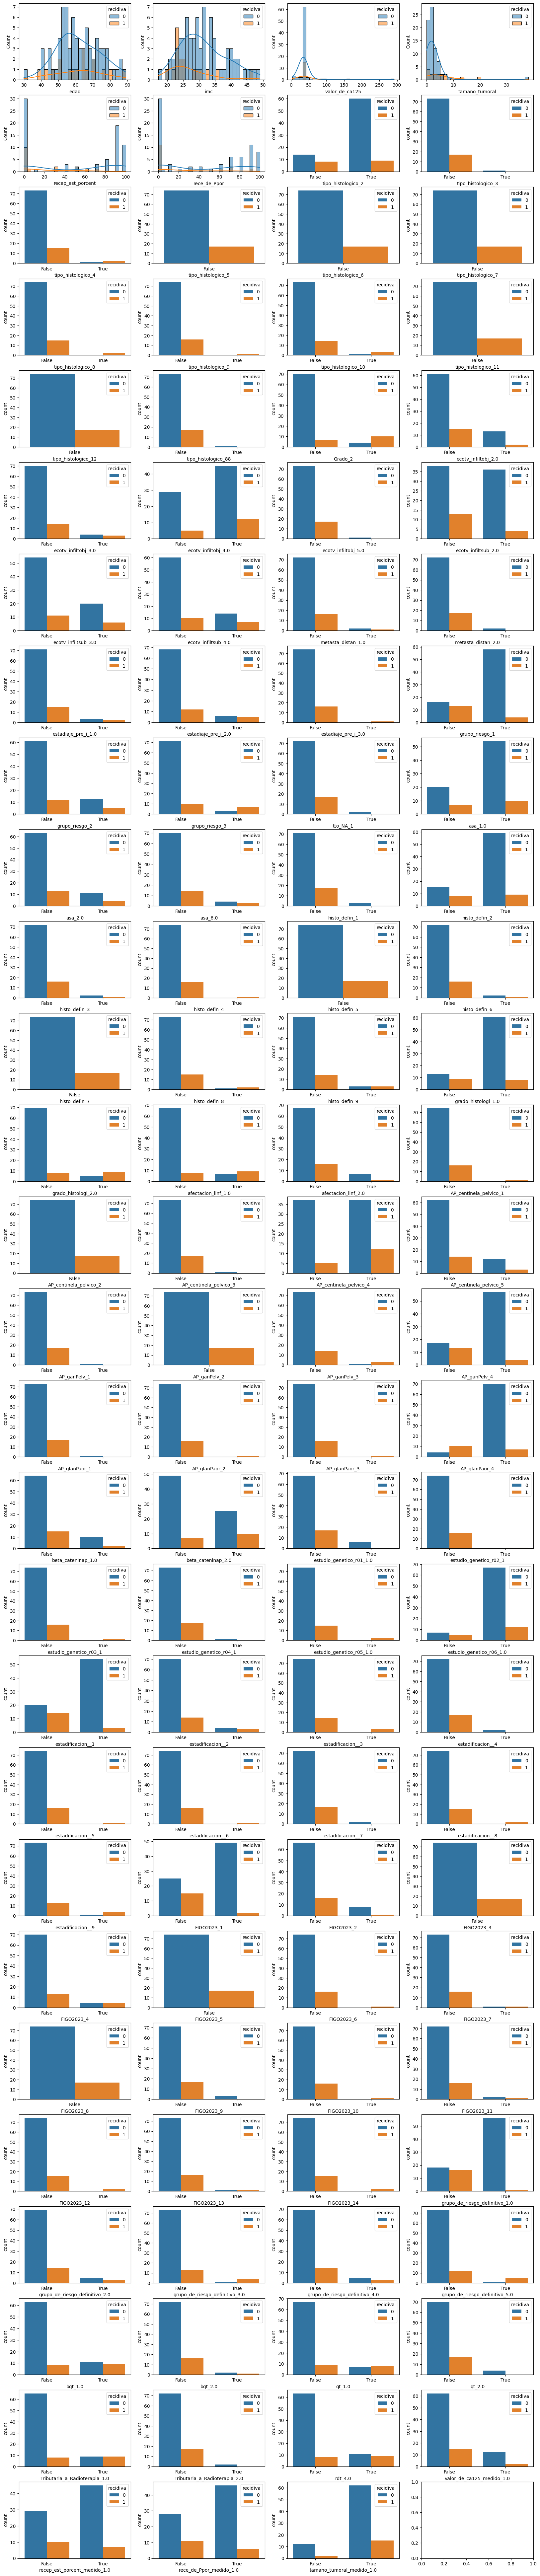

In [144]:
cols = X_train_ohe.columns

fig, axes = plt.subplots(1 + len(cols) // 4, 4, figsize=(20, 100))

for i, val in enumerate(cols):
    ax = axes.flatten()[i]

    if X_train_ohe[val].dtype == "category":
        sns.countplot(
            data=X_train_ohe,
            x=val,
            hue=y_train,
            ax=ax
        )
    else:
        sns.histplot(
            data=X_train_ohe,
            x=val,
            hue=y_train,
            bins=30,
            kde=True,
            ax=ax
)
    

In [145]:
std = StandardScaler()

X_train_std = X_train_ohe.copy()
X_train_std[cols] = std.fit_transform(X_train_std[cols])

In [146]:
X_train_std.describe().T

count          mean      std       min  \
edad                           91.0 -5.337611e-17  1.00554 -2.549106   
imc                            91.0 -3.928481e-16  1.00554 -1.853224   
valor_de_ca125                 91.0 -3.660076e-17  1.00554 -1.131276   
tamano_tumoral                 91.0 -2.196046e-17  1.00554 -0.641289   
recep_est_porcent              91.0 -3.660076e-18  1.00554 -1.018695   
...                             ...           ...      ...       ...   
rdt_4.0                        91.0  9.760202e-18  1.00554 -0.530745   
valor_de_ca125_medido_1.0      91.0 -3.050063e-17  1.00554 -0.426401   
recep_est_porcent_medido_1.0   91.0  7.564157e-17  1.00554 -1.154701   
rece_de_Ppor_medido_1.0        91.0  7.564157e-17  1.00554 -1.154701   
tamano_tumoral_medido_1.0      91.0  4.026083e-17  1.00554 -2.345208   

                                   25%       50%       75%       max  
edad                         -0.702989 -0.060861  0.701666  2.186586  
imc                          -0.755001 -0.177730  0.547379  2.624146  
valor_de_ca125               -0.139490 -0.139490 -0.139490  7.981746  
tamano_tumoral               -0.490944 -0.211733  0.110434  7.520268  
recep_est_porcent            -1.018695 -0.078758  1.096162  1.331146  
...                                ...       ...       ...       ...  
rdt_4.0                      -0.530745 -0.530745 -0.530745  1.884144  
valor_de_ca125_medido_1.0    -0.426401 -0.426401 -0.426401  2.345208  
recep_est_porcent_medido_1.0 -1.154701  0.866025  0.866025  0.866025  
rece_de_Ppor_medido_1.0      -1.154701  0.866025  0.866025  0.866025  
tamano_tumoral_medido_1.0     0.426401  0.426401  0.426401  0.426401  

[111 rows x 8 columns]

In [147]:
pca_recidiva = PCA().fit(X_train_std[cols]);

print(pca_recidiva.explained_variance_ratio_)
print(pca_recidiva.explained_variance_ratio_.cumsum())

[1.37613203e-01 6.97760783e-02 5.37470592e-02 4.77479434e-02
 4.60342749e-02 4.31910258e-02 3.73045792e-02 3.69916613e-02
 3.39107917e-02 3.13951497e-02 3.05722500e-02 2.95910513e-02
 2.69889334e-02 2.67986681e-02 2.42563814e-02 2.25313292e-02
 2.10108058e-02 2.04887646e-02 1.91342773e-02 1.72356668e-02
 1.62337304e-02 1.52146816e-02 1.48902609e-02 1.29335919e-02
 1.27220250e-02 1.23132602e-02 1.11179672e-02 1.00233914e-02
 9.17984475e-03 9.00773524e-03 8.90257196e-03 8.24401331e-03
 7.54648445e-03 7.00158914e-03 6.23770532e-03 5.77242268e-03
 5.40650261e-03 4.73869729e-03 4.36240246e-03 3.94874054e-03
 3.69457204e-03 3.53046485e-03 3.17609474e-03 2.83959120e-03
 2.59933146e-03 2.57500535e-03 2.40836207e-03 2.08802117e-03
 1.77376525e-03 1.50755469e-03 1.31543740e-03 1.29116190e-03
 1.18431078e-03 1.14225413e-03 9.76824559e-04 8.78079306e-04
 7.77914246e-04 7.17532907e-04 6.06645005e-04 5.49489890e-04
 4.66044902e-04 3.94079317e-04 3.01937245e-04 2.88414301e-04
 2.07087398e-04 1.726643

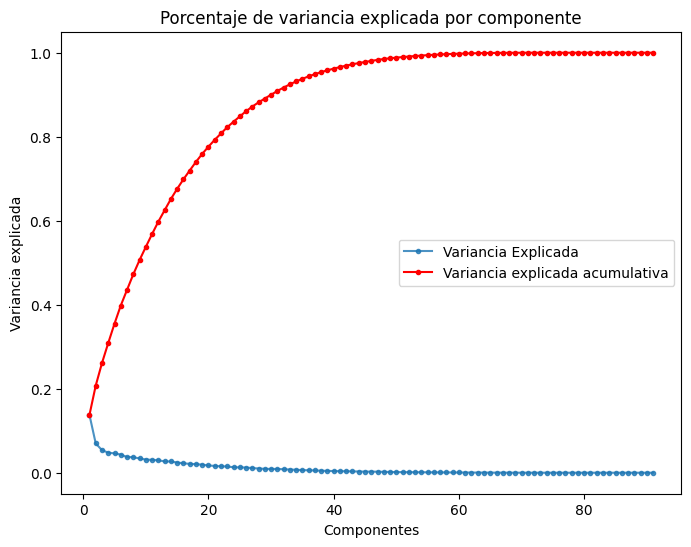

In [148]:
fig = plt.figure(figsize=(8,6));
plt.plot(range(1,len(pca_recidiva.explained_variance_ratio_ )+1),pca_recidiva.explained_variance_ratio_ ,alpha=0.8,marker='.',label="Variancia Explicada");
y_label = plt.ylabel('Variancia explicada');
x_label = plt.xlabel('Componentes');
plt.plot(range(1,len(pca_recidiva.explained_variance_ratio_ )+1),
         np.cumsum(pca_recidiva.explained_variance_ratio_),
         c='red',marker='.',
         label="Variancia explicada acumulativa");
plt.legend();
plt.title('Porcentaje de variancia explicada por componente');

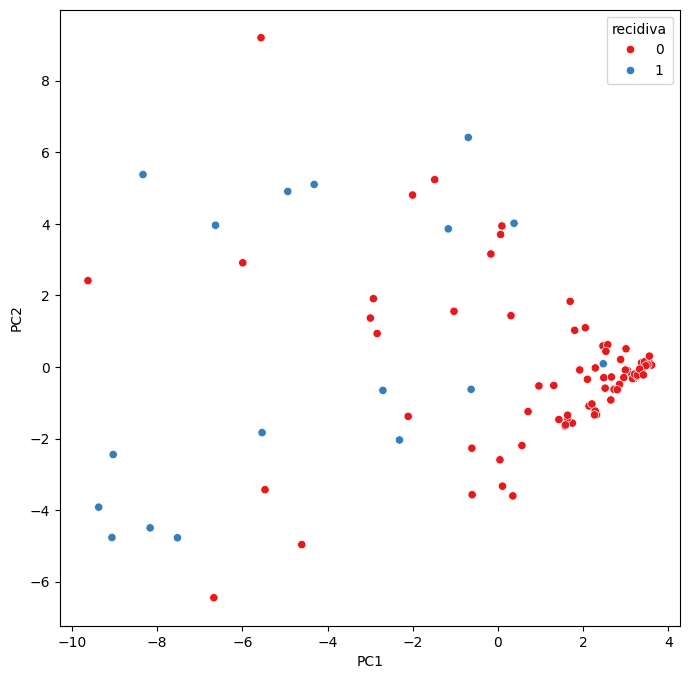

In [149]:
train_pca = pca_recidiva.transform(X_train_std[cols])
X_train_std[['PC1','PC2', 'PC3']] = train_pca[:,:3]
fig = plt.figure(figsize=(8,8))
_ = sns.scatterplot(x='PC1', y='PC2', hue=y_train, data=X_train_std, palette="Set1")

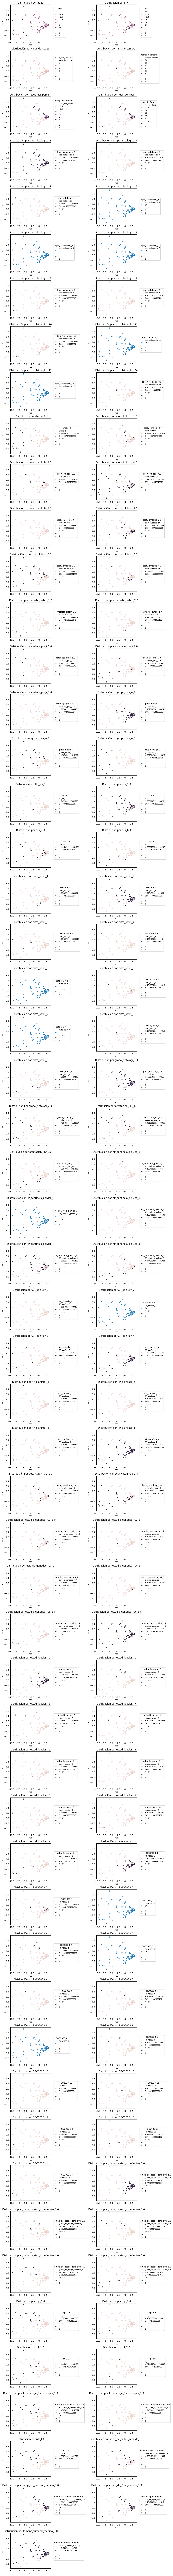

In [150]:
fig, axes = plt.subplots(1 + len(cols) // 2, 2, figsize=(12, 180), constrained_layout=True)

for i, var in enumerate(cols):
    ax = axes.flatten()[i]
    scatter = sns.scatterplot(
        x='PC1', 
        y='PC2', 
        hue=var,
        style=y_train,
        data=X_train_std, 
        ax=ax
    ).set(
        title=f'Distribución por {var}', 
        xlabel='PC1', 
        ylabel='PC2'
    )

    ax.legend(
        loc='center left',
        bbox_to_anchor=(1.05, 0.5),
        title=var,
        fontsize='small'
    )

for j in range(len(cols), axes.size):
    fig.delaxes(axes.flatten()[j])

### Entrenamiento

In [151]:
X_test_ohe = pd.get_dummies(X_test, columns=categoricas, prefix=categoricas, drop_first=True)

cols_ohe = X_test_ohe.select_dtypes(include=["bool"]).columns
X_test_ohe[cols_ohe] = X_test_ohe[cols_ohe].astype("category")

X_test_ohe.head()

edad   imc  valor_de_ca125  tamano_tumoral  recep_est_porcent  \
13   67.0  29.4            35.0             0.0                0.0   
108  78.0  22.3            35.0             0.0                0.0   
4    68.0  31.1            35.0             5.0               90.0   
10   76.0  30.2            35.0             0.2                0.0   
75   56.0  37.4            35.0             3.0               90.0   

     rece_de_Ppor tipo_histologico_2 tipo_histologico_3 tipo_histologico_4  \
13            0.0               True              False              False   
108           0.0               True              False              False   
4            90.0               True              False              False   
10            0.0               True              False              False   
75           90.0              False              False              False   

    tipo_histologico_5  ... bqt_2.0 qt_1.0 qt_2.0  \
13               False  ...   False  False  False   
108              False  ...   False  False  False   
4                False  ...   False  False  False   
10               False  ...   False  False  False   
75               False  ...   False  False  False   

    Tributaria_a_Radioterapia_1.0 Tributaria_a_Radioterapia_2.0 rdt_4.0  \
13                          False                         False   False   
108                         False                         False   False   
4                           False                         False   False   
10                          False                         False   False   
75                          False                         False   False   

    valor_de_ca125_medido_1.0 recep_est_porcent_medido_1.0  \
13                      False                        False   
108                     False                        False   
4                       False                         True   
10                      False                        False   
75                      False                         True   

    rece_de_Ppor_medido_1.0 tamano_tumoral_medido_1.0  
13                    False                     False  
108                   False                     False  
4                      True                      True  
10                    False                      True  
75                     True                      True  

[5 rows x 111 columns]

In [152]:
X_test_std = X_test_ohe.copy()
X_test_std[cols] = std.transform(X_test_std[cols])
X_test_std.describe().T

count      mean       std       min       25%  \
edad                           61.0  0.210201  1.003395 -2.308308 -0.381925   
imc                            61.0  0.057933  1.129999 -1.923623 -0.876087   
valor_de_ca125                 61.0  0.892397  6.092738 -0.798568 -0.139490   
tamano_tumoral                 61.0  0.023959  0.795239 -0.641289 -0.598333   
recep_est_porcent              61.0 -0.016738  1.011370 -1.018695 -1.018695   
...                             ...       ...       ...       ...       ...   
rdt_4.0                        61.0  0.300610  1.156901 -0.530745 -0.530745   
valor_de_ca125_medido_1.0      61.0 -0.108348  0.890712 -0.426401 -0.426401   
recep_est_porcent_medido_1.0   61.0 -0.028394  1.012018 -1.154701 -1.154701   
rece_de_Ppor_medido_1.0        61.0 -0.094648  1.017515 -1.154701 -1.154701   
tamano_tumoral_medido_1.0      61.0 -0.209706  1.175180 -2.345208  0.426401   

                                   50%       75%        max  
edad                          0.340469  0.902330   2.427384  
imc                          -0.135491  0.836014   3.623811  
valor_de_ca125               -0.139490 -0.139490  45.866062  
tamano_tumoral               -0.211733  0.217822   3.439490  
recep_est_porcent            -0.078758  1.096162   1.331146  
...                                ...       ...        ...  
rdt_4.0                      -0.530745  1.884144   1.884144  
valor_de_ca125_medido_1.0    -0.426401 -0.426401   2.345208  
recep_est_porcent_medido_1.0  0.866025  0.866025   0.866025  
rece_de_Ppor_medido_1.0       0.866025  0.866025   0.866025  
tamano_tumoral_medido_1.0     0.426401  0.426401   0.426401  

[111 rows x 8 columns]

In [153]:
test_pca = pca_recidiva.transform(X_test_std[cols])
X_test_std[['PC1','PC2', 'PC3']] = test_pca[:,:3]

In [154]:
norm = MinMaxScaler()
X_train_norm = X_train_ohe.copy()
X_train_norm[cols] = norm.fit_transform(X_train_norm[cols])
X_train_norm.head()

edad       imc  valor_de_ca125  tamano_tumoral  recep_est_porcent  \
153  0.372881  0.257862        0.108832        0.036842                0.5   
157  0.559322  0.361635        0.108832        0.065789                0.9   
67   0.762712  0.191824        0.108832        0.131579                1.0   
151  0.491525  0.194969        0.108832        0.034211                0.8   
74   0.627119  0.188679        0.108832        0.000000                0.0   

     rece_de_Ppor  tipo_histologico_2  tipo_histologico_3  tipo_histologico_4  \
153           0.1                 1.0                 0.0                 0.0   
157           0.7                 1.0                 0.0                 0.0   
67            1.0                 1.0                 0.0                 0.0   
151           0.6                 1.0                 0.0                 0.0   
74            0.0                 1.0                 0.0                 0.0   

     tipo_histologico_5  ...  bqt_2.0  qt_1.0  qt_2.0  \
153                 0.0  ...      0.0     0.0     0.0   
157                 0.0  ...      0.0     0.0     0.0   
67                  0.0  ...      0.0     1.0     0.0   
151                 0.0  ...      0.0     0.0     0.0   
74                  0.0  ...      0.0     0.0     0.0   

     Tributaria_a_Radioterapia_1.0  Tributaria_a_Radioterapia_2.0  rdt_4.0  \
153                            0.0                            0.0      0.0   
157                            0.0                            0.0      0.0   
67                             0.0                            0.0      0.0   
151                            0.0                            0.0      0.0   
74                             0.0                            0.0      0.0   

     valor_de_ca125_medido_1.0  recep_est_porcent_medido_1.0  \
153                        0.0                           1.0   
157                        0.0                           1.0   
67                         0.0                           1.0   
151                        0.0                           1.0   
74                         0.0                           0.0   

     rece_de_Ppor_medido_1.0  tamano_tumoral_medido_1.0  
153                      1.0                        1.0  
157                      1.0                        1.0  
67                       1.0                        1.0  
151                      1.0                        1.0  
74                       0.0                        0.0  

[5 rows x 111 columns]

In [155]:
X_test_norm = X_test_ohe.copy()
X_test_norm[cols] = norm.transform(X_test_norm[cols])
X_test_norm.head()

edad       imc  valor_de_ca125  tamano_tumoral  recep_est_porcent  \
13   0.627119  0.383648        0.108832        0.000000                0.0   
108  0.813559  0.160377        0.108832        0.000000                0.0   
4    0.644068  0.437107        0.108832        0.131579                0.9   
10   0.779661  0.408805        0.108832        0.005263                0.0   
75   0.440678  0.635220        0.108832        0.078947                0.9   

     rece_de_Ppor  tipo_histologico_2  tipo_histologico_3  tipo_histologico_4  \
13            0.0                 1.0                 0.0                 0.0   
108           0.0                 1.0                 0.0                 0.0   
4             0.9                 1.0                 0.0                 0.0   
10            0.0                 1.0                 0.0                 0.0   
75            0.9                 0.0                 0.0                 0.0   

     tipo_histologico_5  ...  bqt_2.0  qt_1.0  qt_2.0  \
13                  0.0  ...      0.0     0.0     0.0   
108                 0.0  ...      0.0     0.0     0.0   
4                   0.0  ...      0.0     0.0     0.0   
10                  0.0  ...      0.0     0.0     0.0   
75                  0.0  ...      0.0     0.0     0.0   

     Tributaria_a_Radioterapia_1.0  Tributaria_a_Radioterapia_2.0  rdt_4.0  \
13                             0.0                            0.0      0.0   
108                            0.0                            0.0      0.0   
4                              0.0                            0.0      0.0   
10                             0.0                            0.0      0.0   
75                             0.0                            0.0      0.0   

     valor_de_ca125_medido_1.0  recep_est_porcent_medido_1.0  \
13                         0.0                           0.0   
108                        0.0                           0.0   
4                          0.0                           1.0   
10                         0.0                           0.0   
75                         0.0                           1.0   

     rece_de_Ppor_medido_1.0  tamano_tumoral_medido_1.0  
13                       0.0                        0.0  
108                      0.0                        0.0  
4                        1.0                        1.0  
10                       0.0                        1.0  
75                       1.0                        1.0  

[5 rows x 111 columns]

In [156]:
lr= LogisticRegression(max_iter=10000, penalty="l1", solver="saga")
param = {'C':10**np.linspace(-3,3,21, endpoint=True)}
lr_gs =  GridSearchCV(lr,param,cv=10, n_jobs=-1, refit=True)
lr_gs.fit(X_train_norm, y_train);

In [157]:
display(HTML(pd.DataFrame(lr_gs.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html()))

In [158]:
X_test_norm.columns == X_train_norm.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

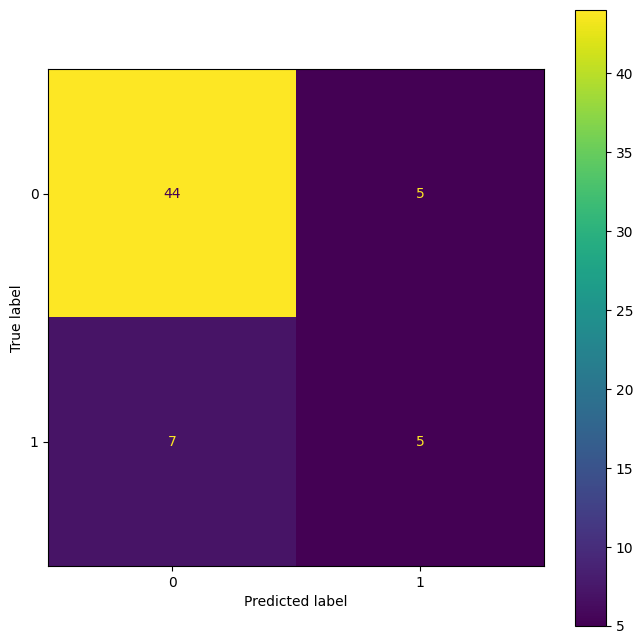

In [159]:
plt.figure(figsize=(8,8));

logistic_model = LogisticRegression(max_iter=10000, penalty="l1", solver="saga", C=1.9952623149688788).fit(X_train_norm, y_train)

ConfusionMatrixDisplay.from_estimator(logistic_model, X_test_norm, y_test, ax=plt.subplot());

Coefs:


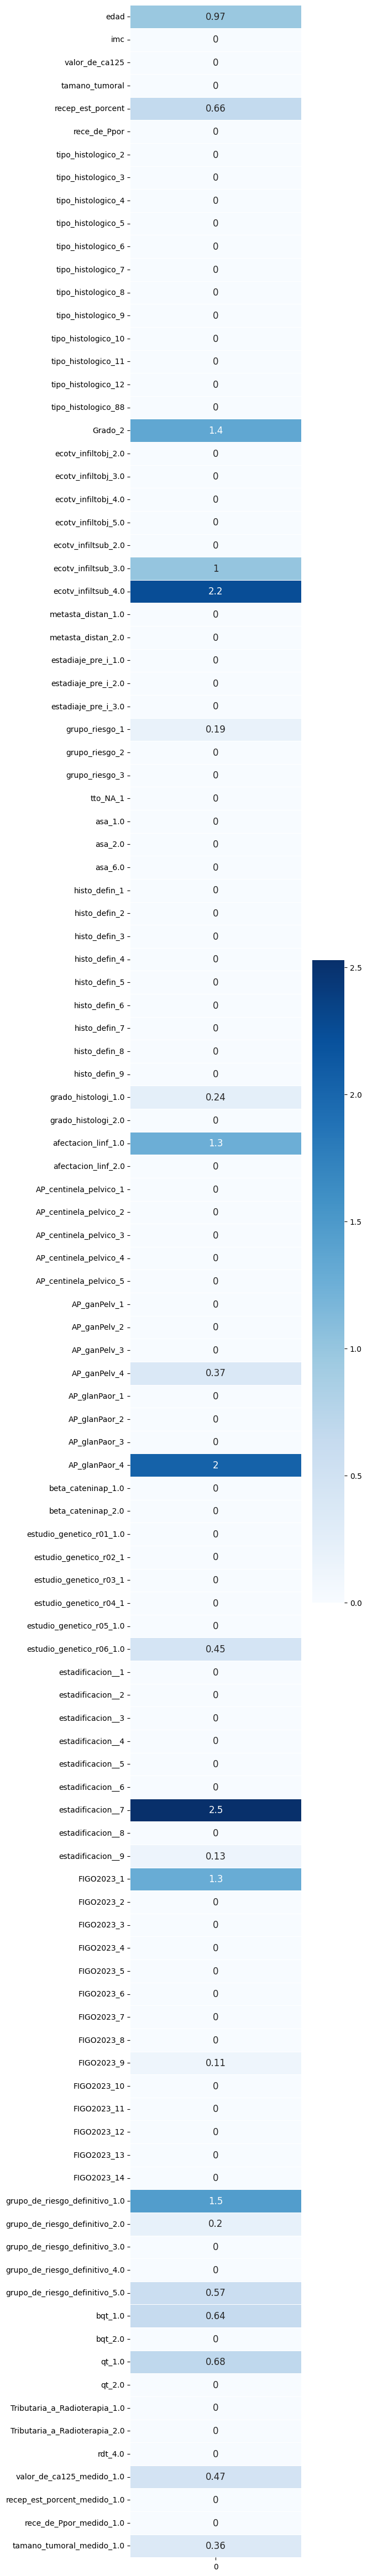

In [160]:
print('Coefs:')
coefs = pd.DataFrame(logistic_model.coef_)
coefs.columns = X_train_norm.columns

plt.figure(figsize=(5,60));
sns.heatmap(coefs.abs().T,annot=True, linewidths=.5,cbar=True,xticklabels=True, cmap='Blues', annot_kws={'size':12});

In [161]:
rfecv = RFECV(estimator=logistic_model, step=1, cv=StratifiedKFold(3), scoring="accuracy", n_jobs=-1)
rfecv.fit(X_train_norm, y_train)

print("Número óptimo de características: ", rfecv.n_features_)
print("Mejores características: ", rfecv.support_)

Número óptimo de características:  4
Mejores características:  [ True False False False False False False False False False False False
 False False False False False False False False False False False False
 False  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False  True
 False False False False False False False False False False False False
 False False False]


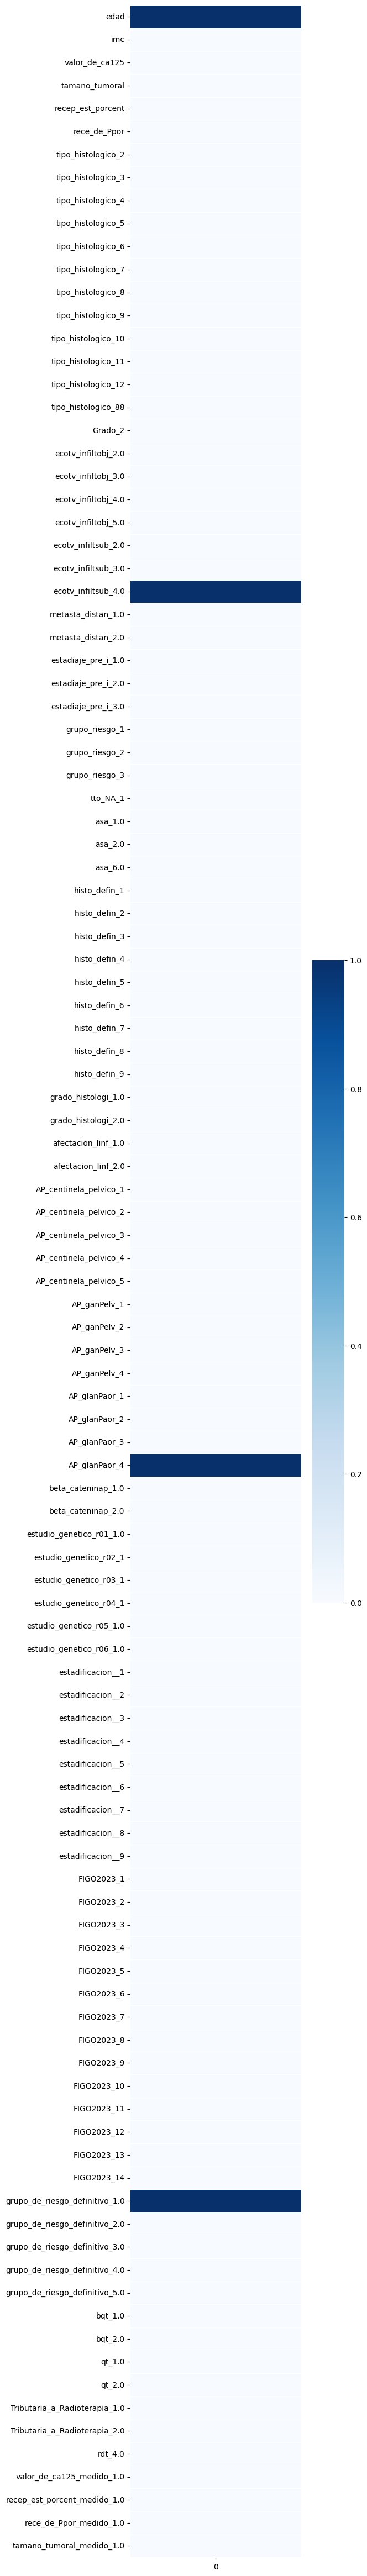

In [162]:
figure = plt.figure(figsize=(5, 60))
sns.heatmap(np.array([rfecv.support_]).T, linewidths=.5, yticklabels=cols, cmap='Blues', annot_kws={'size':12});

In [163]:
X_train_elim = X_train_norm.loc[:, rfecv.support_]
X_test_elim = X_test_norm.loc[:, rfecv.support_]
X_train_elim.describe().T

count      mean       std  min       25%  \
edad                             91.0  0.538275  0.212332  0.0  0.389831   
ecotv_infiltsub_4.0              91.0  0.230769  0.423659  0.0  0.000000   
AP_glanPaor_4                    91.0  0.846154  0.362800  0.0  1.000000   
grupo_de_riesgo_definitivo_1.0   91.0  0.626374  0.486446  0.0  0.000000   

                                     50%       75%  max  
edad                            0.525424  0.686441  1.0  
ecotv_infiltsub_4.0             0.000000  0.000000  1.0  
AP_glanPaor_4                   1.000000  1.000000  1.0  
grupo_de_riesgo_definitivo_1.0  1.000000  1.000000  1.0

In [164]:
lr= LogisticRegression(max_iter=10000, penalty="l1", solver="saga")
param = {'C':10**np.linspace(-3,3,21, endpoint=True)}
lr_gs =  GridSearchCV(lr,param,cv=10, n_jobs=-1, refit=True)
lr_gs.fit(X_train_elim, y_train);

In [165]:
display(HTML(pd.DataFrame(lr_gs.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html()))

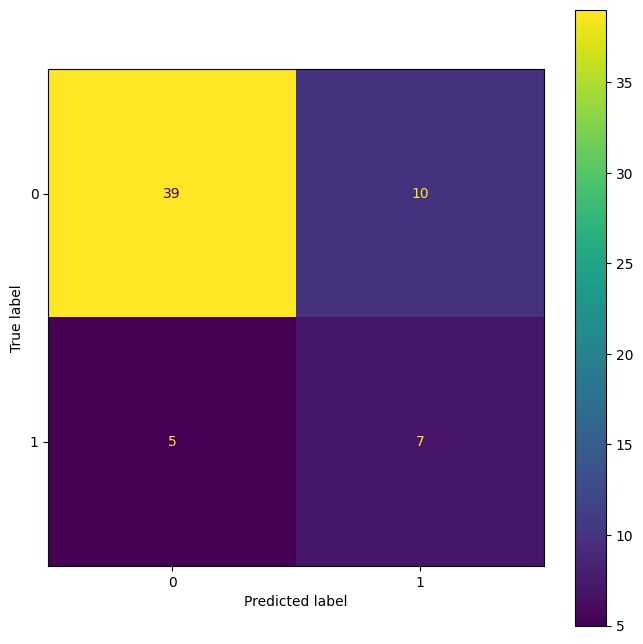

In [166]:
plt.figure(figsize=(8,8));

logistic_model = LogisticRegression(max_iter=10000, penalty="l1", solver="saga", C=1.9952623149688788).fit(X_train_elim, y_train)

ConfusionMatrixDisplay.from_estimator(logistic_model, X_test_elim, y_test, ax=plt.subplot());

In [167]:
# 1. Definir la cuadrícula de hiperparámetros a probar
# Es crucial ser selectivo, ya que el número de combinaciones crece exponencialmente.
param_grid = {
    # Número de árboles en el bosque
    'n_estimators': [100, 200, 300], 
    
    # Profundidad máxima de cada árbol
    'max_depth': [None, 10, 20], 
    
    # Número mínimo de muestras requeridas para dividir un nodo interno
    'min_samples_split': [2, 5], 
    
    # Número mínimo de muestras requeridas en cada nodo hoja
    'min_samples_leaf': [1, 2],
    
    # Función para medir la calidad de una división
    'criterion': ['gini', 'entropy']
}

# 2. Inicializar el modelo base
base_model = RandomForestClassifier(random_state=42)

# 3. Inicializar el GridSearchCV
grid_search = GridSearchCV(
    estimator=base_model,      # El modelo que queremos optimizar
    param_grid=param_grid,     # El diccionario de hiperparámetros
    scoring='accuracy',        # La métrica a optimizar (puedes usar 'f1', 'recall', etc.)
    cv=5,                      # Número de pliegues (folds) para la Validación Cruzada
    verbose=2,                 # Nivel de detalle de la salida (2 es bueno)
    n_jobs=-1                  # Usar todos los núcleos del procesador para acelerar
)

# 4. Ejecutar la búsqueda en la cuadrícula (entrenamiento)
print("Iniciando búsqueda en cuadrícula...")
grid_search.fit(X_train_norm, y_train)

print("Búsqueda finalizada.")

Iniciando búsqueda en cuadrícula...
Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samp

In [168]:
display(HTML(pd.DataFrame(grid_search.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html()))

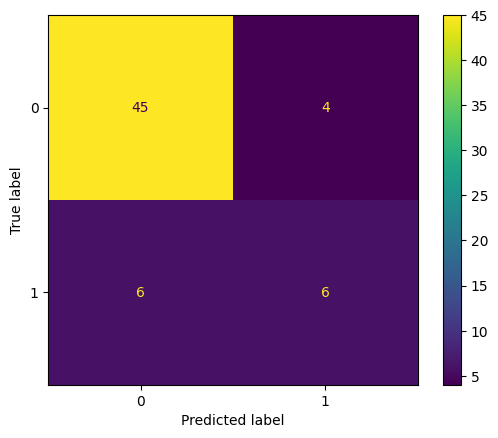

In [169]:
model_rf = RandomForestClassifier(n_estimators=100, criterion="gini", max_depth=None, min_samples_leaf=1, min_samples_split=5, random_state=42)

# 3. Entrenar el modelo
model_rf.fit(X_train_norm, y_train)

ConfusionMatrixDisplay.from_estimator(model_rf, X_test_norm, y_test, ax=plt.subplot());

In [170]:
# 1. Definir la cuadrícula de hiperparámetros a probar
# Es crucial ser selectivo, ya que el número de combinaciones crece exponencialmente.
param_grid = {
    # Número de árboles en el bosque
    'n_estimators': [100, 200, 300], 
    
    # Profundidad máxima de cada árbol
    'max_depth': [None, 10, 20], 
    
    # Número mínimo de muestras requeridas para dividir un nodo interno
    'min_samples_split': [2, 5], 
    
    # Número mínimo de muestras requeridas en cada nodo hoja
    'min_samples_leaf': [1, 2],
    
    # Función para medir la calidad de una división
    'criterion': ['gini', 'entropy']
}

# 2. Inicializar el modelo base
base_model = RandomForestClassifier(random_state=42)

# 3. Inicializar el GridSearchCV
grid_search = GridSearchCV(
    estimator=base_model,      # El modelo que queremos optimizar
    param_grid=param_grid,     # El diccionario de hiperparámetros
    scoring='accuracy',        # La métrica a optimizar (puedes usar 'f1', 'recall', etc.)
    cv=5,                      # Número de pliegues (folds) para la Validación Cruzada
    verbose=2,                 # Nivel de detalle de la salida (2 es bueno)
    n_jobs=-1                  # Usar todos los núcleos del procesador para acelerar
)

# 4. Ejecutar la búsqueda en la cuadrícula (entrenamiento)
print("Iniciando búsqueda en cuadrícula...")
grid_search.fit(X_train_elim, y_train)

print("Búsqueda finalizada.")

Iniciando búsqueda en cuadrícula...
Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samp

In [171]:
display(HTML(pd.DataFrame(grid_search.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html()))

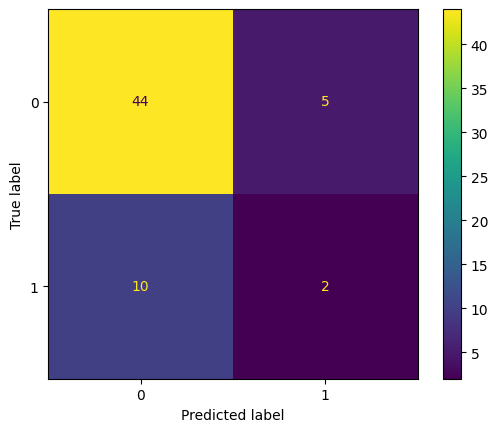

In [172]:
model_rf = RandomForestClassifier(n_estimators=200, criterion="entropy", max_depth=10, min_samples_leaf=1, min_samples_split=2, random_state=42)

# 3. Entrenar el modelo
model_rf.fit(X_train_elim, y_train)

ConfusionMatrixDisplay.from_estimator(model_rf, X_test_elim, y_test, ax=plt.subplot());

In [173]:
param_grid = {
    # Coeficiente de regularización C (potencias de 10)
    'C': [0.1, 1, 10, 100], 
    
    # Coeficiente del kernel gamma (potencias de 10, incluyendo 'scale' que es heurística)
    'gamma': [0.001, 0.01, 0.1, 'scale'], 
    
    # Tipo de kernel a probar
    'kernel': ['rbf', "poly", "sigmoid"],

    'degree': [2, 3, 4],

    'class_weight': ["balanced", None]
}

svm_model = SVC(random_state=42, probability=True)

# 3. Inicializar el GridSearchCV
grid_search_svm = GridSearchCV(
    estimator=svm_model,        # Le pasamos el Pipeline
    param_grid=param_grid,     
    scoring='f1',        # La métrica a optimizar (ajusta si necesitas 'recall', 'f1', etc.)
    cv=5,                      
    verbose=2,                 
    n_jobs=-1                  
)

# 4. Ejecutar la búsqueda en la cuadrícula (entrenamiento)
print("Iniciando búsqueda en cuadrícula para SVM...")
# Entrenamos con los datos sin escalar (el Pipeline se encarga de escalarlos internamente)
grid_search_svm.fit(X_train_norm, y_train) 

print("Búsqueda finalizada.")

Iniciando búsqueda en cuadrícula para SVM...
Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV] END C=0.1, class_weight=balanced, degree=2, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=2, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=2, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=2, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=2, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=2, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=2, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=2, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=2, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=2, g

In [174]:
display(HTML(pd.DataFrame(grid_search_svm.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html()))

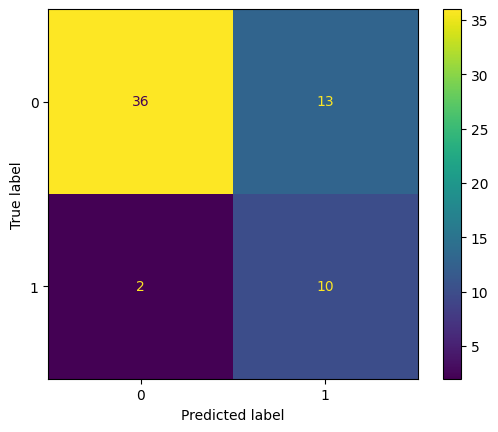

In [175]:
model_rf = SVC(C=1, gamma=0.1, kernel="sigmoid", class_weight="balanced", degree=3, probability=True, random_state=42)

# 3. Entrenar el modelo
model_rf.fit(X_train_norm, y_train)

ConfusionMatrixDisplay.from_estimator(model_rf, X_test_norm, y_test, ax=plt.subplot());

In [176]:
param_grid = {
    # Coeficiente de regularización C (potencias de 10)
    'C': [0.1, 1, 10, 100], 
    
    # Coeficiente del kernel gamma (potencias de 10, incluyendo 'scale' que es heurística)
    'gamma': [0.001, 0.01, 0.1, 'scale'], 
    
    # Tipo de kernel a probar
    'kernel': ['rbf'] 
}

svm_model = SVC(random_state=42, probability=True)

# 3. Inicializar el GridSearchCV
grid_search_svm = GridSearchCV(
    estimator=svm_model,        # Le pasamos el Pipeline
    param_grid=param_grid,     
    scoring='accuracy',        # La métrica a optimizar (ajusta si necesitas 'recall', 'f1', etc.)
    cv=5,                      
    verbose=2,                 
    n_jobs=-1                  
)

# 4. Ejecutar la búsqueda en la cuadrícula (entrenamiento)
print("Iniciando búsqueda en cuadrícula para SVM...")
# Entrenamos con los datos sin escalar (el Pipeline se encarga de escalarlos internamente)
grid_search_svm.fit(X_train_elim, y_train) 

print("Búsqueda finalizada.")

Iniciando búsqueda en cuadrícula para SVM...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV

In [177]:
display(HTML(pd.DataFrame(grid_search_svm.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html()))

In [178]:
# 1. Definir la cuadrícula de hiperparámetros a probar
# Es crucial ser selectivo, ya que el número de combinaciones crece exponencialmente.
param_grid = {
    # Número de árboles en el bosque
    'n_estimators': [100, 200, 300], 
    
    # Profundidad máxima de cada árbol
    'max_depth': [None, 10, 20], 
    
    # Número mínimo de muestras requeridas para dividir un nodo interno
    'min_samples_split': [2, 5], 
    
    # Número mínimo de muestras requeridas en cada nodo hoja
    'min_samples_leaf': [1, 2],
    
    # Función para medir la calidad de una división
    'criterion': ['gini', 'entropy']
}

# 2. Inicializar el modelo base
base_model = RandomForestClassifier(random_state=42)

# 3. Inicializar el GridSearchCV
grid_search = GridSearchCV(
    estimator=base_model,      # El modelo que queremos optimizar
    param_grid=param_grid,     # El diccionario de hiperparámetros
    scoring='accuracy',        # La métrica a optimizar (puedes usar 'f1', 'recall', etc.)
    cv=5,                      # Número de pliegues (folds) para la Validación Cruzada
    verbose=2,                 # Nivel de detalle de la salida (2 es bueno)
    n_jobs=-1                  # Usar todos los núcleos del procesador para acelerar
)

# 4. Ejecutar la búsqueda en la cuadrícula (entrenamiento)
print("Iniciando búsqueda en cuadrícula...")
grid_search.fit(X_train_std[["PC1", "PC2", "PC3"]], y_train)

print("Búsqueda finalizada.")

Iniciando búsqueda en cuadrícula...
Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_sampl

In [179]:
display(HTML(pd.DataFrame(grid_search.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html()))

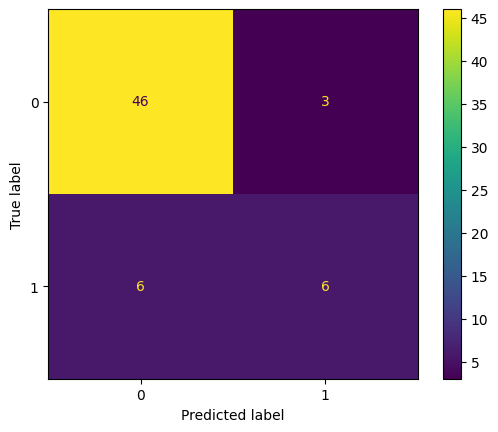

In [180]:
model_rf = RandomForestClassifier(n_estimators=300, criterion="entropy", max_depth=10, min_samples_leaf=2, min_samples_split=5, random_state=42)

# 3. Entrenar el modelo
model_rf.fit(X_train_std[["PC1", "PC2", "PC3"]], y_train)

ConfusionMatrixDisplay.from_estimator(model_rf, X_test_std[["PC1", "PC2", "PC3"]], y_test, ax=plt.subplot());

In [181]:
test_pca = pca_recidiva.transform(X_test_std[cols])
X_test_std[['PC1','PC2', 'PC3']] = test_pca[:,:3]

In [186]:
def random_forest_test(X_train_func, y_train_func):
    # 1. Definir la cuadrícula de hiperparámetros a probar
    # Es crucial ser selectivo, ya que el número de combinaciones crece exponencialmente.
    param_grid = {
        # Número de árboles en el bosque
        'n_estimators': [100, 200, 300], 
        
        # Profundidad máxima de cada árbol
        'max_depth': [None, 10, 20], 
        
        # Número mínimo de muestras requeridas para dividir un nodo interno
        'min_samples_split': [2, 5], 
        
        # Número mínimo de muestras requeridas en cada nodo hoja
        'min_samples_leaf': [1, 2],
        
        # Función para medir la calidad de una división
        'criterion': ['gini', 'entropy']
    }

    # 2. Inicializar el modelo base
    base_model = RandomForestClassifier(random_state=42)

    # 3. Inicializar el GridSearchCV
    grid_search = GridSearchCV(
        estimator=base_model,      # El modelo que queremos optimizar
        param_grid=param_grid,     # El diccionario de hiperparámetros
        scoring='f1',        # La métrica a optimizar (puedes usar 'f1', 'recall', etc.)
        cv=5,                      # Número de pliegues (folds) para la Validación Cruzada
        verbose=0,                 # Nivel de detalle de la salida (2 es bueno)
        n_jobs=-1                 # Usar todos los núcleos del procesador para acelerar
    )

    # 4. Ejecutar la búsqueda en la cuadrícula (entrenamiento)
    print("Iniciando búsqueda en cuadrícula...")
    grid_search.fit(X_train_func, y_train_func)

    print("Búsqueda finalizada.")

    return (pd.DataFrame(grid_search.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score')).iloc[1]["params"]

    

In [187]:
def svm_test(X_train_func, y_train_func):
    param_grid = {
        # Coeficiente de regularización C (potencias de 10)
        'C': [0.1, 1, 10, 100], 
        
        # Coeficiente del kernel gamma (potencias de 10, incluyendo 'scale' que es heurística)
        'gamma': [0.001, 0.01, 0.1, 'scale'], 
        
        # Tipo de kernel a probar
        'kernel': ['rbf', "poly", "sigmoid"],

        'degree': [1, 2, 3],

        'class_weight': ["balanced", None]
    }

    svm_model = SVC(random_state=42, probability=True)

    # 3. Inicializar el GridSearchCV
    grid_search_svm = GridSearchCV(
        estimator=svm_model,        # Le pasamos el Pipeline
        param_grid=param_grid,     
        scoring='f1',        # La métrica a optimizar (ajusta si necesitas 'recall', 'f1', etc.)
        cv=5,                      
        verbose=0,                 
        n_jobs=-1              
    )

    # 4. Ejecutar la búsqueda en la cuadrícula (entrenamiento)
    print("Iniciando búsqueda en cuadrícula para SVM...")
    # Entrenamos con los datos sin escalar (el Pipeline se encarga de escalarlos internamente)
    grid_search_svm.fit(X_train_func, y_train_func) 

    print("Búsqueda finalizada.")

    return (pd.DataFrame(grid_search_svm.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score')).iloc[1]["params"]


Iniciando búsqueda en cuadrícula...
Búsqueda finalizada.
Iniciando búsqueda en cuadrícula para SVM...
Búsqueda finalizada.
2 componentes ready.
Iniciando búsqueda en cuadrícula...
Búsqueda finalizada.
Iniciando búsqueda en cuadrícula para SVM...
Búsqueda finalizada.
3 componentes ready.
Iniciando búsqueda en cuadrícula...
Búsqueda finalizada.
Iniciando búsqueda en cuadrícula para SVM...
Búsqueda finalizada.
4 componentes ready.
Iniciando búsqueda en cuadrícula...
Búsqueda finalizada.
Iniciando búsqueda en cuadrícula para SVM...
Búsqueda finalizada.
5 componentes ready.
Iniciando búsqueda en cuadrícula...
Búsqueda finalizada.
Iniciando búsqueda en cuadrícula para SVM...
Búsqueda finalizada.
6 componentes ready.
Iniciando búsqueda en cuadrícula...
Búsqueda finalizada.
Iniciando búsqueda en cuadrícula para SVM...
Búsqueda finalizada.
7 componentes ready.
Iniciando búsqueda en cuadrícula...
Búsqueda finalizada.
Iniciando búsqueda en cuadrícula para SVM...
Búsqueda finalizada.
8 componentes

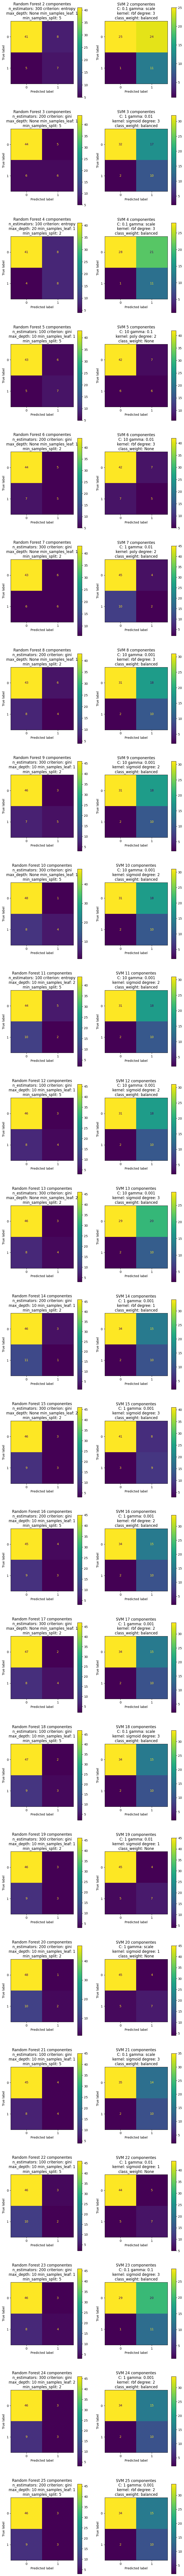

In [188]:
fig, axes = plt.subplots(24, 2, figsize=(10, 150))


for i in range(2, 26):
    ax_rf = axes[i - 2][0]
    ax_svm = axes[i - 2][1]

    params_rf = random_forest_test(train_pca[:, :i], y_train)
    ax_rf.set_title(f"Random Forest {i} componentes\nn_estimators: {params_rf["n_estimators"]} criterion: {params_rf["criterion"]}\nmax_depth: {params_rf["max_depth"]} min_samples_leaf: {params_rf["min_samples_leaf"]}\nmin_samples_split: {params_rf["min_samples_split"]}")

    params_svm = svm_test(train_pca[:, :i], y_train)
    ax_svm.set_title(f"SVM {i} componentes\nC: {params_svm["C"]} gamma: {params_svm["gamma"]}\nkernel: {params_svm["kernel"]} degree: {params_svm["degree"]}\nclass_weight: {params_svm["class_weight"]}")

    print(f"{i} componentes ready.")

    model_rf = RandomForestClassifier(n_estimators=params_rf["n_estimators"], criterion=params_rf["criterion"], max_depth=params_rf["max_depth"], min_samples_leaf=params_rf["min_samples_leaf"], min_samples_split=params_rf["min_samples_split"], random_state=42)
    model_rf.fit(train_pca[:, :i], y_train)
    ConfusionMatrixDisplay.from_estimator(model_rf, test_pca[:, :i], y_test, ax=ax_rf);

    model_svm = SVC(C=params_svm["C"], gamma=params_svm["gamma"], kernel=params_svm["kernel"], degree=params_svm["degree"], class_weight=params_svm["class_weight"], probability=True, random_state=42)
    model_svm.fit(train_pca[:, :i], y_train)
    ConfusionMatrixDisplay.from_estimator(model_svm, test_pca[:, :i], y_test, ax=ax_svm); 
    

In [189]:
model_svm = SVC(C=0.1, gamma="scale", kernel="sigmoid", degree=3, class_weight="balanced", probability=True, random_state=42)
model_svm.fit(train_pca[:, :19], y_train)


SVC(C=0.1, class_weight='balanced', kernel='sigmoid', probability=True,
    random_state=42)

In [190]:
y_pred = model_svm.predict(test_pca[:, :19])